# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
import pandas as pd
import plotly.express as px
from rich.jupyter import display

In [49]:
df = pd.read_csv("/Users/cavend/Desktop/1kg_NA12878_gencode100_ENCSR000AED/allele_exp/allele_exp_rpvg_mpmap_1kg_NA12878_gencode100_sim_vg_r2_ENCSR000AED_rep1_1_2.txt", sep='\t')

filtered_df = df[df['AlleleNum'].isin([0, 1])]
 
filtered_df['NewAlleleType'] = filtered_df['AlleleType'].apply(lambda x: 'Ref' if x == 'Ref' else 'Alt')

# Combine rows based on 'position' column and label columns by 'AlleleType'
def combine_rows(group):
    # Initialize a dictionary to hold combined values
    combined = {'Position': group['Position'].iloc[0]}  # Use the first position
    for _, row in group.iterrows():
        label = row['NewAlleleType']  # Get the label (ref/alt)
        for col in group.columns:
            if col not in ['Position', 'NewAlleleType']:
                # Add the values to the combined dictionary with proper labels
                combined[f"{label}_{col}"] = row[col]
    return pd.Series(combined)

# Apply combining function to each group
combined_df = filtered_df.groupby('Position').apply(combine_rows).reset_index(drop=True)

# Combine ref_tmp and alt_tmp into total_count
combined_df['total_count'] = combined_df['Ref_TPM'] + combined_df['Alt_TPM']

# Filter DataFrame for rows where total_count is greater than 8
filtered_combined_df = combined_df[combined_df['total_count'] > 8]

/var/folders/b9/4lblclmx3gx7pqp1ths6wz_9d4kdfd/T/ipykernel_7765/258040026.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['NewAlleleType'] = filtered_df['AlleleType'].apply(lambda x: 'Ref' if x == 'Ref' else 'Alt')
/var/folders/b9/4lblclmx3gx7pqp1ths6wz_9d4kdfd/T/ipykernel_7765/258040026.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_df = filtered_df.groupby('Position').apply(combine_rows).reset_index(drop=True)


In [50]:
filtered_combined_df['Alt_TPM'] = filtered_combined_df['Alt_TPM'].round()
filtered_combined_df['Ref_TPM'] = filtered_combined_df['Ref_TPM'].round()

filtered_combined_df['Ref_TranscriptReadCount'] = filtered_combined_df['Ref_TranscriptReadCount'].round()
filtered_combined_df['Alt_TranscriptReadCount'] = filtered_combined_df['Alt_TranscriptReadCount'].round()

/var/folders/b9/4lblclmx3gx7pqp1ths6wz_9d4kdfd/T/ipykernel_7765/817425857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_combined_df['Alt_TPM'] = filtered_combined_df['Alt_TPM'].round()
/var/folders/b9/4lblclmx3gx7pqp1ths6wz_9d4kdfd/T/ipykernel_7765/817425857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_combined_df['Ref_TPM'] = filtered_combined_df['Ref_TPM'].round()
/var/folders/b9/4lblclmx3gx7pqp1ths6wz_9d4kdfd/T/ipykernel_7765/817425857.py:4: SettingWithCopyWarning: 
A value

In [51]:
display(filtered_combined_df)
filtered_combined_df.to_csv('/Users/cavend/Desktop/output_dataframe_filtered_combined_df.csv', index=False)

,Position,Ref_Chrom,Ref_AlleleSeq,Ref_AlleleNum,Ref_AlleleType,Ref_AlleleLength,Ref_HomopolymerLength,Ref_NumTandemRepeats,Ref_Probability,Ref_BaseReadCount,...,Alt_AlleleNum,Alt_AlleleType,Alt_AlleleLength,Alt_HomopolymerLength,Alt_NumTandemRepeats,Alt_Probability,Alt_BaseReadCount,Alt_TranscriptReadCount,Alt_TPM,total_count
0,15903,1,G,0,Ref,0,2,0,1.0,40.225848,...,1,Ins,1,2,2,1.0,53.876077,361.0,8.0,13.403691
1,16949,1,A,0,Ref,0,1,0,1.0,40.225848,...,1,SNV,1,1,2,1.0,53.876077,361.0,8.0,13.403691
11,629906,1,C,0,Ref,0,1,0,0.0,0.000000,...,1,SNV,1,1,2,1.0,8688.573952,44905.0,1311.0,1310.977500
12,629915,1,A,0,Ref,0,1,0,0.0,0.000000,...,1,SNV,1,1,2,1.0,8688.573952,44905.0,1311.0,1310.977500
13,630026,1,C,0,Ref,0,1,0,0.0,0.000000,...,1,SNV,1,1,2,1.0,8688.573952,44905.0,1311.0,1310.977500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16458,247190770,1,C,0,Ref,0,1,0,0.0,0.000000,...,1,SNV,1,1,1,1.0,163.392478,1185.0,23.0,22.935843
16462,247297425,1,A,0,Ref,0,1,0,0.0,0.000000,...,1,SNV,1,1,2,1.0,84.297238,2404.0,10.0,10.495245
16463,247297856,1,CAAG,0,Ref,0,2,0,0.0,0.000000,...,1,Del,-3,2,1,1.0,84.297238,2404.0,10.0,10.495245
16464,247298746,1,A,0,Ref,0,2,0,0.0,0.000000,...,1,SNV,1,2,3,1.0,84.297238,2404.0,10.0,10.495245


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom

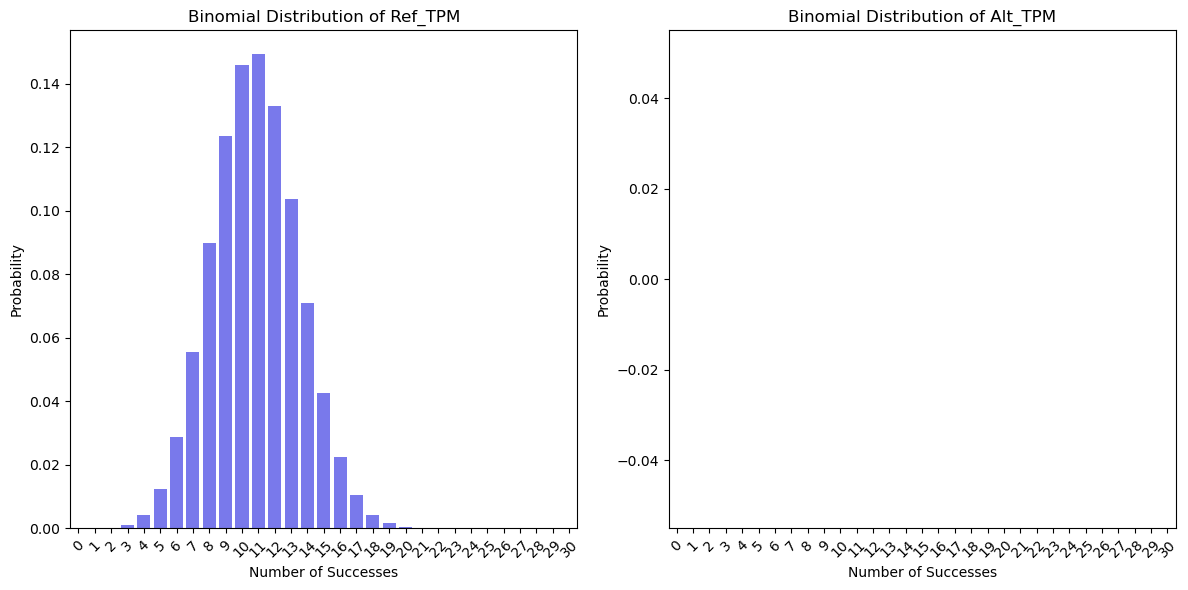

In [52]:
# Calculate parameters for the binomial distribution
n = 30  # number of trials (total number of observations)
p_ref = filtered_combined_df['Ref_TPM'].mean() / n  # probability of success for Ref_TPM
p_alt = filtered_combined_df['Alt_TPM'].mean() / n  # probability of success for Alt_TPM

# Create a range of x values (number of successes)
x = np.arange(0, n + 1)

# Calculate the binomial probability mass function for Ref_TPM and Alt_TPM
pmf_ref = binom.pmf(x, n, p_ref)
pmf_alt = binom.pmf(x, n, p_alt)

# Plotting
plt.figure(figsize=(12, 6))

# Plot for Ref_TPM
plt.subplot(1, 2, 1)
sns.barplot(x=x, y=pmf_ref, color='blue', alpha=0.6)
plt.title('Binomial Distribution of Ref_TPM')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.xticks(rotation=45)

# Plot for Alt_TPM
plt.subplot(1, 2, 2)
sns.barplot(x=x, y=pmf_alt, color='orange', alpha=0.6)
plt.title('Binomial Distribution of Alt_TPM')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()

In [150]:
#df2 = pd.read_csv(
#    "/Users/cavend/Downloads/rpvg_mpmap_1kg_all_af001_gencode100_sim_vg_r2_SRR1153470_joint.txt",
#    sep='\t')
df2 = pd.read_csv("/Users/cavend/Desktop/20_EUROPE/EUR_20_Analysis/CSVs/HG00114_PAN_MAGE_Merged.csv")
df2['total_count'] = df2['ReadCount_1'] + df2['ReadCount_2']

filtered_combined_df2 = df2[df2['total_count'] > 8]

filtered_combined_df2['ReadCount_1'] = filtered_combined_df2['ReadCount_1'].round()
filtered_combined_df2['ReadCount_2'] = filtered_combined_df2['ReadCount_2'].round()

#filtered_combined_df2['matching'] = filtered_combined_df2.apply(lambda x: x.ReadCount_1 == x.ReadCount_1, axis=1)

#filtered_combined_df2.to_csv('/Users/cavend/Desktop/VG_TEAM_NA12878_On_Genetype_proteincoding_For_R.csv', index=False)

#display(filtered_combined_df2)

/var/folders/b9/4lblclmx3gx7pqp1ths6wz_9d4kdfd/T/ipykernel_4559/2952404561.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_combined_df2['ReadCount_1'] = filtered_combined_df2['ReadCount_1'].round()
/var/folders/b9/4lblclmx3gx7pqp1ths6wz_9d4kdfd/T/ipykernel_4559/2952404561.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_combined_df2['ReadCount_2'] = filtered_combined_df2['ReadCount_2'].round()


In [156]:
filtered_combined_df2

,gene_id,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2,gene_type,aCount,bCount,Pan_Total,MAGE_Total,log_Pan_Total,log_MAGE_Total,total_count,binom_p,binom_q
0,ENSG00000000419,1.000000,386,44.353872,386,44.353872,protein_coding,0.0,0.0,772.555888,0.0,6.650998,0.000000,772.555888,1.000000,1.000000
1,ENSG00000000457,0.400000,106,2.623843,108,2.645193,protein_coding,24.0,21.0,214.083840,45.0,5.371028,3.828641,214.083840,0.945521,1.000000
2,ENSG00000000460,0.296296,58,3.984982,58,3.985410,protein_coding,125.0,162.0,115.424752,287.0,4.757245,5.662960,115.424752,1.000000,1.000000
3,ENSG00000000938,1.000000,730,34.028064,730,34.028064,protein_coding,0.0,0.0,1459.372904,0.0,7.286447,0.000000,1459.372904,1.000000,1.000000
5,ENSG00000001084,0.423077,127,4.041896,73,1.941898,protein_coding,15.0,10.0,199.984146,25.0,5.303226,3.258097,199.984146,0.000164,0.000874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14276,ENSG00000285827,1.000000,78,3.179005,78,3.179005,protein_coding,NaN,NaN,156.207892,NaN,5.057569,NaN,156.207892,1.000000,1.000000
14281,ENSG00000285901,0.100000,64,1.802068,31,0.863864,protein_coding,NaN,NaN,94.577188,NaN,4.559934,NaN,94.577188,0.000925,0.004255
14283,ENSG00000285932,0.333333,17,0.887186,17,0.887186,protein_coding,NaN,NaN,33.489787,NaN,3.540663,NaN,33.489787,1.000000,1.000000
14285,ENSG00000285943,0.250000,38,0.514611,39,0.526072,protein_coding,NaN,NaN,77.068180,NaN,4.357583,NaN,77.068180,1.000000,1.000000


/var/folders/b9/4lblclmx3gx7pqp1ths6wz_9d4kdfd/T/ipykernel_4559/2598038619.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cov8['ReadCount_1'] = cov8['ReadCount_1'].astype(int)
/var/folders/b9/4lblclmx3gx7pqp1ths6wz_9d4kdfd/T/ipykernel_4559/2598038619.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cov8['ReadCount_2'] = cov8['ReadCount_2'].astype(int)
/var/folders/b9/4lblclmx3gx7pqp1ths6wz_9d4kdfd/T/ipykernel_4559/2598038619.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

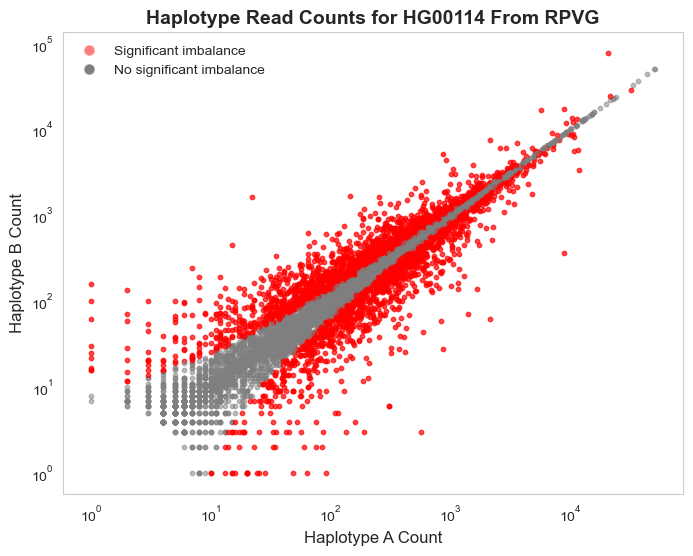

In [157]:
import pandas as pd
from scipy.stats import binomtest
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
cov8 = filtered_combined_df2

# Ensure the count columns are integers
cov8['ReadCount_1'] = cov8['ReadCount_1'].astype(int)
cov8['ReadCount_2'] = cov8['ReadCount_2'].astype(int)

# Calculate binomial p-value for each row and store the p-value in 'binom_p'
cov8['binom_p'] = cov8.apply(lambda row: binomtest(row['ReadCount_1'], 
                                                   row['ReadCount_1'] + row['ReadCount_2'], 
                                                   p=0.5).pvalue, axis=1)

# Perform FDR correction
cov8['binom_q'] = multipletests(cov8['binom_p'], method='fdr_bh')[1]

# Plot Haplotype A versus Haplotype B counts
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('white')  # Set figure background to white
ax.set_facecolor('white')         # Set axis background to white

# Define colors based on FDR significance
colors = np.where(cov8['binom_q'] < 0.05, 'red', '#7f7f7f')  # Gray for non-significant points
alphas = np.where(cov8['binom_q'] < 0.05, 0.7, 0.5)          # Lighter opacity for non-significant

# Scatter plot
for x, y, color, alpha in zip(cov8['ReadCount_1'], cov8['ReadCount_2'], colors, alphas):
    ax.scatter(x, y, c=color, alpha=alpha, s=10)

# Log scale for axes
ax.set_xscale('log')
ax.set_yscale('log')

# Add labels and title
ax.set_xlabel("Haplotype A Count", fontsize=12)
ax.set_ylabel("Haplotype B Count", fontsize=12)
ax.set_title("Haplotype Read Counts for HG00114 From RPVG", fontsize=14, fontweight='bold')

# Add legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, alpha=0.5, label='Significant imbalance'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=8, alpha=0.5, label='No significant imbalance')
]
ax.legend(handles=handles, loc='upper left', frameon=False)

# Save and show plot
plt.savefig("/Users/cavend/Downloads/HG00114_RPVG.png", dpi=300)
plt.show()


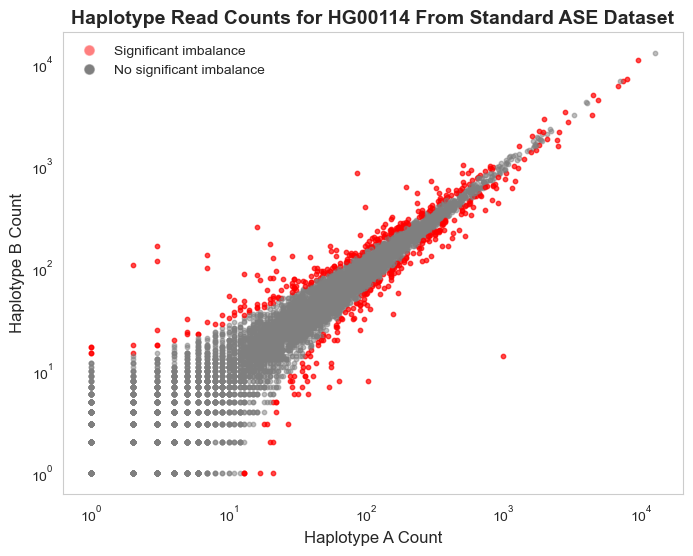

In [163]:
import pandas as pd
from scipy.stats import binomtest
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
cov8 = filtered_combined_df2

#cov8 = cov8.dropna()  # Drop rows with NaN
#cov8 = cov8[~np.isinf(cov8)]  # Drop rows with infinity

cov8 = cov8[cov8['aCount'] >= 1]
cov8 = cov8[cov8['bCount'] >= 1]

# Ensure the count columns are integers
cov8['aCount'] = cov8['aCount'].astype(int)
cov8['bCount'] = cov8['bCount'].astype(int)

# Calculate binomial p-value for each row and store the p-value in 'binom_p'
cov8['binom_p'] = cov8.apply(lambda row: binomtest(row['aCount'], 
                                                   row['aCount'] + row['bCount'], 
                                                   p=0.5).pvalue, axis=1)

# Perform FDR correction
cov8['binom_q'] = multipletests(cov8['binom_p'], method='fdr_bh')[1]

# Plot Haplotype A versus Haplotype B counts
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('white')  # Set figure background to white
ax.set_facecolor('white')         # Set axis background to white

# Define colors based on FDR significance
colors = np.where(cov8['binom_q'] < 0.05, 'red', '#7f7f7f')  # Gray for non-significant points
alphas = np.where(cov8['binom_q'] < 0.05, 0.7, 0.5)          # Lighter opacity for non-significant

# Scatter plot
for x, y, color, alpha in zip(cov8['aCount'], cov8['bCount'], colors, alphas):
    ax.scatter(x, y, c=color, alpha=alpha, s=10)

# Log scale for axes
ax.set_xscale('log')
ax.set_yscale('log')

# Add labels and title
ax.set_xlabel("Haplotype A Count", fontsize=12)
ax.set_ylabel("Haplotype B Count", fontsize=12)
ax.set_title("Haplotype Read Counts for HG00114 From Standard ASE Dataset", fontsize=14, fontweight='bold')

# Add legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, alpha=0.5, label='Significant imbalance'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=8, alpha=0.5, label='No significant imbalance')
]
ax.legend(handles=handles, loc='upper left', frameon=False)

# Save and show plot
plt.savefig("/Users/cavend/Downloads/HG00114_Standard.png", dpi=300)
plt.show()


In [174]:
import pandas as pd 
import numpy as np

#Their_ASE = pd.read_csv("/Users/cavend/Downloads/rpvg_strand_mpmap_1kg_nonCEU_af001_gencode100_unidi_real_r2_SRR1153470_joint.txt", sep='\t')
Their_ASE = pd.read_csv("/Users/cavend/Downloads/rpvg_strand_mpmap_1kg_all_af001_gencode100_unidi_real_r2_SRR1153470_joint.txt", sep='\t')

#MINE_ASE = pd.read_csv("/Users/cavend/Downloads/rpvg_results_NA12878_joint_MINE.txt", sep='\t')
#MINE_ASE = pd.read_csv("/Users/cavend/Downloads/SRR19762225_rpvg_results_joint_THEIR_FASTQ.txt", sep='\t')
#MINE_ASE = pd.read_csv("/Users/cavend/Downloads/TestTwice/SRR1153470_rpvg_results_joint_their_actual_out.txt", sep='\t')

#MINE_ASE = pd.read_csv("/Users/cavend/Downloads/SRR19762225_rpvg_results_joint.txt", sep='\t')

#Their_ASE = pd.read_csv("/Users/cavend/Downloads/TestTwice/SRR19762225_rpvg_results_joint.txt", sep='\t')
MINE_ASE = pd.read_csv("/Users/cavend/Downloads/TestTwice/SRR1153470_rpvg_results_joint_Their_Same_Seed.txt", sep='\t')

#df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})

Their_ASE["Their_ReadCount_Total"] = Their_ASE["ReadCount_1"] + Their_ASE["ReadCount_2"]
MINE_ASE["MINE_ReadCount_Total"] = MINE_ASE["ReadCount_1"] + MINE_ASE["ReadCount_2"]

Their_ASE['log_THEIR_h1_h2_abs'] = np.log2(((Their_ASE['ReadCount_1']+1)/(Their_ASE['ReadCount_2']+1))).abs()
MINE_ASE['log_MINE_h1_h2_abs'] = np.log2(((MINE_ASE['ReadCount_1']+1)/(MINE_ASE['ReadCount_2']+1))).abs()

Merged_ASE = Their_ASE.merge(MINE_ASE, on = "Name_1", how = "inner")

Merged_ASE

#Merged_ASE_filtered = Merged_ASE[Merged_ASE["Their_ReadCount_Total"] < 2500]
Merged_ASE_filtered = Merged_ASE[Merged_ASE["Their_ReadCount_Total"] > 50]
Merged_ASE_filtered = Merged_ASE_filtered[Merged_ASE_filtered["MINE_ReadCount_Total"] > 50]


In [175]:
Merged_ASE

,Name_1,Name_2_x,ClusterID_x,HaplotypingProbability_x,ReadCount_1_x,TPM_1_x,ReadCount_2_x,TPM_2_x,Their_ReadCount_Total,log_THEIR_h1_h2_abs,Name_2_y,ClusterID_y,HaplotypingProbability_y,ReadCount_1_y,TPM_1_y,ReadCount_2_y,TPM_2_y,MINE_ReadCount_Total,log_MINE_h1_h2_abs
0,ENST00000594885.1_38,ENST00000594885.1_38,6,1.000000,2.703165e+01,1.205706,2.703165e+01,1.205706,5.406329e+01,0.000000,ENST00000594885.1_38,6,1.000000,2.666882e+01,1.315044,2.666882e+01,1.315044,5.333764e+01,0.000000
1,ENST00000598436.1_15,ENST00000598436.1_15,6,1.000000,4.193724e+01,2.078805,4.193724e+01,2.078805,8.387448e+01,0.000000,ENST00000598436.1_15,6,1.000000,4.323965e+01,2.369860,4.323965e+01,2.369860,8.647931e+01,0.000000
2,ENST00000598182.5_11,ENST00000598182.5_11,6,1.000000,2.052573e+00,0.091257,2.052573e+00,0.091257,4.105147e+00,0.000000,ENST00000598182.5_11,6,1.000000,1.753109e+00,0.086167,1.753109e+00,0.086167,3.506217e+00,0.000000
3,ENST00000596417.1_9,ENST00000596417.1_9,6,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,ENST00000596417.1_9,6,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
4,ENST00000309311.6_42,ENST00000309311.6_144,6,1.000000,1.362554e+05,649.955890,1.384481e+05,660.415070,2.747035e+05,0.023031,ENST00000309311.6_144,6,1.000000,1.367096e+05,720.148580,1.391123e+05,732.805230,2.758220e+05,0.025135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3890689,ENST00000389232.9_1926,ENST00000389232.9_1946,23818,0.051326,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,ENST00000389232.9_1943,13911,0.007653,3.721908e-03,0.000004,3.721908e-03,0.000004,7.443817e-03,0.000000
3890690,ENST00000389232.9_1926,ENST00000389232.9_1946,23818,0.051326,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,ENST00000389232.9_1945,13911,0.010714,5.210672e-03,0.000005,5.210672e-03,0.000005,1.042134e-02,0.000000
3890691,ENST00000415757.7_1908,ENST00000415757.7_1926,23818,0.040564,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,ENST00000415757.7_1926,13911,0.008394,0.000000e+00,0.000000,1.362663e-03,0.000001,1.362663e-03,0.001965
3890692,ENST00000415757.7_1908,ENST00000415757.7_1926,23818,0.040564,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,ENST00000415757.7_1933,13911,0.009358,0.000000e+00,0.000000,1.519034e-03,0.000002,1.519034e-03,0.002190


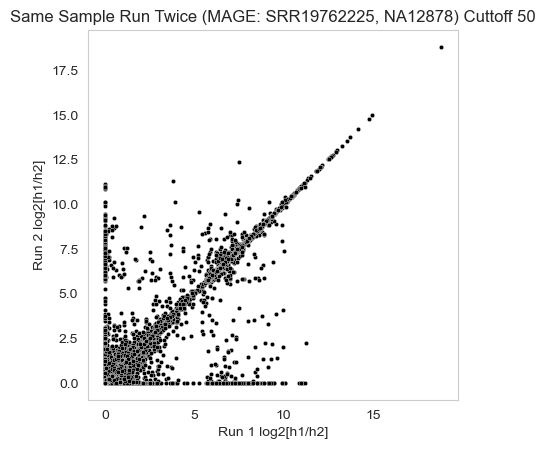

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatterplot
sns.scatterplot(data=Merged_ASE_filtered, x='log_THEIR_h1_h2_abs', y='log_MINE_h1_h2_abs', 
                color='black', s=10)  # s=10 makes the points smaller

# Set titles and labels
plt.title("Same Sample Run Twice (MAGE: SRR19762225, NA12878) Cuttoff 50")
#plt.xlabel("Pangenome Tool log2[h1/h2]")
#plt.ylabel("Standard log2[h1/h2]")

plt.xlabel("Run 1 log2[h1/h2]")
plt.ylabel("Run 2 log2[h1/h2]")

# Adjust the axis settings
plt.axis('equal')
plt.axis('square')

sns.set_style("whitegrid", {'axes.grid' : False})
plt.grid(False)
#plt.right_ax.grid(False)

#plt.tight_layout()
#plt.margins(x=0, y=0)
#plt.tight_layout(pad=0)

# Save the plot
plt.savefig("/Users/cavend/Downloads/Same_Sample_Run_Twice.png", dpi=300)
plt.show()

In [36]:
Annotation_df = pd.read_csv("/Users/cavend/Downloads/gencode.v29.primary_assembly.annotation_renamed_full_subset80.gtf", sep='\t', header=None)

# Split the 9th column (Info) by ';' and expand into new columns
df_split = Annotation_df.iloc[:, 8].str.split(';', expand=True)

# Combine the original DataFrame (excluding the 9th column) with the split columns
Annotation_df_split = pd.concat([Annotation_df.drop(columns=Annotation_df.columns[8]), df_split], axis=1)

Annotation_df_split.columns = range(Annotation_df_split.shape[1])

Annotation_df_split_rename = Annotation_df_split
Annotation_df_split_rename = Annotation_df_split_rename.rename(columns={8: 'gene_id'})
Annotation_df_split_rename = Annotation_df_split_rename.rename(columns={9: 'transcript_id'})
Annotation_df_split_rename = Annotation_df_split_rename.rename(columns={10: 'gene_type'})

Annotation_df_split_rename['gene_id'] = Annotation_df_split_rename['gene_id'].str.strip().str.replace('^gene_id ', '', regex=True)
Annotation_df_split_rename['gene_id'] = Annotation_df_split_rename['gene_id'].str.strip().str.replace('"', '', regex=True)
Annotation_df_split_rename['transcript_id'] = Annotation_df_split_rename['transcript_id'].str.strip().str.replace('^transcript_id ', '', regex=True)
Annotation_df_split_rename['transcript_id'] = Annotation_df_split_rename['transcript_id'].str.strip().str.replace('"', '', regex=True)
Annotation_df_split_rename['gene_type'] = Annotation_df_split_rename['gene_type'].str.strip().str.replace('^gene_type ', '', regex=True)
Annotation_df_split_rename['gene_type'] = Annotation_df_split_rename['gene_type'].str.strip().str.replace('"', '', regex=True)

Annotation_df_split_rename_Small = Annotation_df_split_rename[['gene_id', 'transcript_id', 'gene_type']]
Annotation_df_split_rename_Small_filtered = Annotation_df_split_rename_Small[Annotation_df_split_rename_Small['gene_type'] == 'protein_coding']
Annotation_df_split_rename_Small_filtered = Annotation_df_split_rename_Small_filtered.drop_duplicates()
Annotation_df_split_rename_Small_filtered

/var/folders/b9/4lblclmx3gx7pqp1ths6wz_9d4kdfd/T/ipykernel_4559/3962145103.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  Annotation_df = pd.read_csv("/Users/cavend/Downloads/gencode.v29.primary_assembly.annotation_renamed_full_subset80.gtf", sep='\t', header=None)


,gene_id,transcript_id,gene_type
40,ENSG00000186092.6,ENST00000641515.2,protein_coding
51,ENSG00000186092.6,ENST00000335137.4,protein_coding
196,ENSG00000284733.1,ENST00000426406.3,protein_coding
285,ENSG00000284662.1,ENST00000332831.4,protein_coding
439,ENSG00000187634.11,ENST00000618181.4,protein_coding
...,...,...,...
1781656,ENSG00000277761.1,ENST00000614110.1,protein_coding
1781661,ENSG00000278633.1,ENST00000619792.1,protein_coding
1781679,ENSG00000276017.1,ENST00000617983.1,protein_coding
1781685,ENSG00000278817.1,ENST00000613204.1,protein_coding


In [139]:
Pangenome_NA12878_df = pd.read_csv("/Users/cavend/Downloads/SRR19762225_rpvg_results_joint.txt", delimiter="\t")
#Pangenome_NA12878_df = pd.read_csv("/Users/cavend/Downloads/rpvg_strand_mpmap_1kg_nonCEU_af001_gencode100_unidi_real_r2_SRR1153470_joint.txt", delimiter="\t")

Pangenome_NA12878_df['transcript_id'] = Pangenome_NA12878_df['Name_1']
Pangenome_NA12878_df['transcript_id'] = Pangenome_NA12878_df['transcript_id'].str.replace(r'_\d+', '', regex=True)

Pangenome_NA12878_df_merge = Pangenome_NA12878_df.merge(Annotation_df_split_rename_Small_filtered, on='transcript_id')

Pangenome_NA12878_df_merge_dropped = Pangenome_NA12878_df_merge.iloc[:, 3:]
Pangenome_NA12878_df_merge_dropped = Pangenome_NA12878_df_merge_dropped.drop('transcript_id', axis=1)
Pangenome_NA12878_df_merge_dropped

agg_funcs = {
    'HaplotypingProbability': 'mean',
    'ReadCount_1': 'sum',
    'TPM_1': 'sum',
    'ReadCount_2': 'sum',
    'TPM_2': 'sum',
    #'total_count': 'sum',
    'gene_type': 'first'  # Assuming gene_type is the same for the same gene_id
}

# Group by 'gene_id' and aggregate
Pangenome_NA12878_df_merge_dropped_grouped = Pangenome_NA12878_df_merge_dropped.groupby('gene_id').agg(agg_funcs).reset_index()
Pangenome_NA12878_df_merge_dropped_grouped

,gene_id,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2,gene_type
0,ENSG00000000003.14,0.135135,16.684516,0.506220,1.314194,0.038990,protein_coding
1,ENSG00000000419.12,0.750000,557.105392,42.988535,557.105392,42.988535,protein_coding
2,ENSG00000000457.13,0.250000,71.669038,1.223778,75.117835,1.258019,protein_coding
3,ENSG00000000460.16,0.296296,116.094955,5.376653,116.094955,5.376653,protein_coding
4,ENSG00000000938.12,0.714286,462.129301,13.498074,462.129301,13.498074,protein_coding
...,...,...,...,...,...,...,...
15189,ENSG00000285950.1,0.062500,0.500000,0.027367,0.500000,0.027367,protein_coding
15190,ENSG00000285976.1,0.500000,1150.941092,14.455546,1150.941092,14.455546,protein_coding
15191,ENSG00000285978.1,0.023256,0.457932,0.020302,0.461303,0.020451,protein_coding
15192,ENSG00000285982.1,1.000000,0.000000,0.000000,0.000000,0.000000,protein_coding


In [140]:
df_MAGE_NA12878 = pd.read_csv("/Users/cavend/Downloads/NA12878.concatenated.hap.gene.txt", delimiter='\t')

df_MAGE_NA12878['gene_id'] = df_MAGE_NA12878['name']

df_MAGE_NA12878

,contig,start,stop,name,aCount,bCount,totalCount,log2_aFC,n_variants,variants,gw_phased,bam,gene_id
0,chr1,11869,14403,ENSG00000223972.5,0,0,0,inf,0,NaN,1,NA12878.Aligned.sorted,ENSG00000223972.5
1,chr1,14410,29553,ENSG00000227232.5,0,0,0,inf,0,NaN,1,NA12878.Aligned.sorted,ENSG00000227232.5
2,chr1,17369,17436,ENSG00000278267.1,0,0,0,inf,0,NaN,1,NA12878.Aligned.sorted,ENSG00000278267.1
3,chr1,29571,31109,ENSG00000243485.5,0,0,0,inf,0,NaN,1,NA12878.Aligned.sorted,ENSG00000243485.5
4,chr1,34554,36081,ENSG00000237613.2,0,0,0,inf,0,NaN,1,NA12878.Aligned.sorted,ENSG00000237613.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56195,chrM,14149,14673,ENSG00000198695.2,0,0,0,inf,0,NaN,1,NA12878.Aligned.sorted,ENSG00000198695.2
56196,chrM,14674,14742,ENSG00000210194.1,0,0,0,inf,0,NaN,1,NA12878.Aligned.sorted,ENSG00000210194.1
56197,chrM,14747,15887,ENSG00000198727.2,0,0,0,inf,0,NaN,1,NA12878.Aligned.sorted,ENSG00000198727.2
56198,chrM,15888,15953,ENSG00000210195.2,0,0,0,inf,0,NaN,1,NA12878.Aligned.sorted,ENSG00000210195.2


In [141]:
NA12878_Merged_Pan_Mage = df_MAGE_NA12878.merge(Pangenome_NA12878_df_merge_dropped_grouped, on='gene_id', how='inner')
NA12878_Merged_Pan_Mage

,contig,start,stop,name,aCount,bCount,totalCount,log2_aFC,n_variants,variants,gw_phased,bam,gene_id,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2,gene_type
0,chr1,923928,944203,ENSG00000187634.11,2,1,3,1.000000,2,"chr1_940820_G_C,chr1_940390_A_G",1,NA12878.Aligned.sorted,ENSG00000187634.11,0.031250,1.566922,0.157626,1.580901,0.158446,protein_coding
1,chr1,944582,959309,ENSG00000188976.10,0,0,0,inf,0,NaN,1,NA12878.Aligned.sorted,ENSG00000188976.10,0.363636,1088.067836,33.732897,1091.039407,33.854470,protein_coding
2,chr1,960587,965715,ENSG00000187961.13,0,0,0,inf,0,NaN,1,NA12878.Aligned.sorted,ENSG00000187961.13,0.400000,124.048308,4.109498,124.068432,4.114685,protein_coding
3,chr1,966497,975108,ENSG00000187583.10,3,1,4,1.584963,1,chr1_974039_C_T,1,NA12878.Aligned.sorted,ENSG00000187583.10,0.034091,15.142804,0.424338,11.394989,0.319252,protein_coding
4,chr1,975204,982093,ENSG00000187642.9,0,0,0,inf,0,NaN,1,NA12878.Aligned.sorted,ENSG00000187642.9,0.016216,0.857910,0.056576,1.142090,0.075316,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13433,chrY,12904108,12920478,ENSG00000067048.16,0,0,0,inf,0,NaN,1,NA12878.Aligned.sorted,ENSG00000067048.16,0.714286,30.065786,0.831658,30.933727,0.847813,protein_coding
13434,chrY,13248379,13480673,ENSG00000183878.15,0,0,0,inf,0,NaN,1,NA12878.Aligned.sorted,ENSG00000183878.15,0.250000,2.137451,0.102261,3.862549,0.065687,protein_coding
13435,chrY,13703567,13706024,ENSG00000154620.5,0,0,0,inf,0,NaN,1,NA12878.Aligned.sorted,ENSG00000154620.5,1.000000,0.500000,0.021909,0.500000,0.021909,protein_coding
13436,chrY,19705415,19744939,ENSG00000012817.15,0,0,0,inf,0,NaN,1,NA12878.Aligned.sorted,ENSG00000012817.15,0.181818,5.773452,0.067134,2.812086,0.032699,protein_coding


In [142]:
NA12878_Merged_Pan_Mage["PAN_ReadCount_Total"] = NA12878_Merged_Pan_Mage["ReadCount_1"] + NA12878_Merged_Pan_Mage["ReadCount_2"]
NA12878_Merged_Pan_Mage["MAGE_ReadCount_Total"] = NA12878_Merged_Pan_Mage["aCount"] + NA12878_Merged_Pan_Mage["bCount"]

NA12878_Merged_Pan_Mage['log_MAGE_h1_h2_abs'] = np.log2(((NA12878_Merged_Pan_Mage['aCount']+1)/(NA12878_Merged_Pan_Mage['bCount']+1))).abs()
NA12878_Merged_Pan_Mage['log_PAN_h1_h2_abs'] = np.log2(((NA12878_Merged_Pan_Mage['ReadCount_1']+1)/(NA12878_Merged_Pan_Mage['ReadCount_2']+1))).abs()

#Merged_ASE_filtered = Merged_ASE[Merged_ASE["Their_ReadCount_Total"] < 2500]
NA12878_Merged_Pan_Mage = NA12878_Merged_Pan_Mage[NA12878_Merged_Pan_Mage["PAN_ReadCount_Total"] > 50]
NA12878_Merged_Pan_Mage = NA12878_Merged_Pan_Mage[NA12878_Merged_Pan_Mage["MAGE_ReadCount_Total"] > 50]

NA12878_Merged_Pan_Mage

,contig,start,stop,name,aCount,bCount,totalCount,log2_aFC,n_variants,variants,...,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2,gene_type,PAN_ReadCount_Total,MAGE_ReadCount_Total,log_MAGE_h1_h2_abs,log_PAN_h1_h2_abs
6,chr1,1020123,1056118,ENSG00000188157.14,617,647,1264,-0.068495,42,"chr1_1037956_A_G,chr1_1037997_G_A,chr1_1038078...",...,0.388889,2265.254635,22.174974,2302.279175,22.930305,protein_coding,4567.533810,1264,0.068387,0.023379
8,chr1,1081818,1116361,ENSG00000131591.17,50,39,89,0.358454,11,"chr1_1086035_A_G,chr1_1086315_A_G,chr1_1086657...",...,0.203390,122.601899,4.869314,144.723891,5.748000,protein_coding,267.325790,89,0.350497,0.237537
24,chr1,1402047,1407313,ENSG00000242485.5,247,267,514,-0.112329,1,chr1_1407232_G_C,...,0.500000,56.553583,4.338255,38.586613,2.612133,protein_coding,95.140196,514,0.111893,0.539893
33,chr1,1615879,1630610,ENSG00000197530.12,81,105,186,-0.374396,13,"chr1_1622295_G_C,chr1_1622510_C_T,chr1_1625805...",...,0.500000,662.244042,20.336805,450.486070,15.983018,protein_coding,1112.730112,186,0.370368,0.554858
45,chr1,2321253,2391707,ENSG00000116151.13,33,27,60,0.289507,30,"chr1_2352403_G_T,chr1_2352457_A_G,chr1_2356095...",...,0.067308,33.059054,1.293306,52.935505,2.560834,protein_coding,85.994560,60,0.280108,0.663197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13364,chrX,150692971,150765103,ENSG00000063601.16,2,58,60,-4.857981,2,"chrX_150734097_G_A,chrX_150762712_G_A",...,0.714286,325.857279,5.569916,324.136717,5.545793,protein_coding,649.993997,60,4.297681,0.007614
13377,chrX,152830967,152869729,ENSG00000147383.10,115,2,117,5.845490,3,"chrX_152832061_T_C,chrX_152851171_A_G,chrX_152...",...,0.166667,279.499536,10.973440,279.499536,10.973440,protein_coding,558.999071,117,5.273018,0.000000
13383,chrX,153447666,153495516,ENSG00000213397.10,3,62,65,-4.369234,7,"chrX_153456270_T_C,chrX_153460821_G_T,chrX_153...",...,0.346154,152.231199,15.291244,151.647466,15.265612,protein_coding,303.878665,65,3.977280,0.005506
13388,chrX,153724868,153744762,ENSG00000101986.11,33,20,53,0.722466,3,"chrX_153743516_C_T,chrX_153743743_G_C,chrX_153...",...,1.000000,154.889588,2.858716,86.107468,1.629664,protein_coding,240.997056,53,0.695145,0.839656


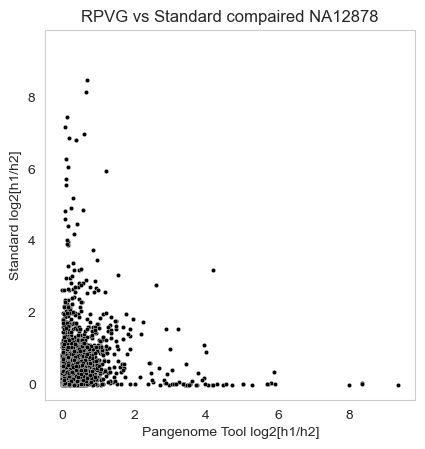

In [170]:
# Create the scatterplot
sns.scatterplot(data=NA12878_Merged_Pan_Mage, x='log_MAGE_h1_h2_abs', y='log_PAN_h1_h2_abs', 
                color='black', s=10)  # s=10 makes the points smaller

# Set titles and labels
plt.title("RPVG vs Standard compaired NA12878")
plt.xlabel("RPVG Counts log2[h1/h2]")
plt.ylabel("Standard Counts log2[h1/h2]")

# Adjust the axis settings
plt.axis('equal')
plt.axis('square')

# Save the plot
plt.savefig("/Users/cavend/Downloads/NA12878_Pangenome_vs_Standard_log_Filter_Cuttoff_50_Paper.png", dpi=300)
plt.show()

In [4]:
import pandas as pd

# Load CSV file into a DataFrame
df = pd.read_csv('/Users/cavend/Desktop/20_EUROPE/EUR_20_Analysis/CSVs/HG00114_PAN_MAGE_Merged.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Basic information about the DataFrame
print(df.info())

# Descriptive statistics
print(df.describe())



           gene_id  HaplotypingProbability  ReadCount_1      TPM_1  \
0  ENSG00000000419                1.000000   386.277944  44.353872   
1  ENSG00000000457                0.400000   106.308390   2.623843   
2  ENSG00000000460                0.296296    57.703790   3.984982   
3  ENSG00000000938                1.000000   729.686452  34.028064   
4  ENSG00000001036                1.000000     0.000000   0.000000   

   ReadCount_2      TPM_2       gene_type  aCount  bCount    Pan_Total  \
0   386.277944  44.353872  protein_coding     0.0     0.0   772.555888   
1   107.775450   2.645193  protein_coding    24.0    21.0   214.083840   
2    57.720962   3.985410  protein_coding   125.0   162.0   115.424752   
3   729.686452  34.028064  protein_coding     0.0     0.0  1459.372904   
4     0.000000   0.000000  protein_coding   167.0   189.0     0.000000   

   MAGE_Total  log_Pan_Total  log_MAGE_Total  ReadCount_diff  
0         0.0       6.650998        0.000000        0.000000  
1       

In [5]:
summary_stats = df['ReadCount_diff'].describe()
print(summary_stats)

count    14290.000000
mean        -6.891667
std        529.791492
min     -56454.234820
25%         -4.059539
50%          0.000000
75%          1.978913
max       8548.638784
Name: ReadCount_diff, dtype: float64
